In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def flexura_num(x, Te, p, rhoi=1_000.0, rompida=False):
    dx = x[1] - x[0]

    E = 1.0e11
    v = 0.25
    g = 9.8
    rhom = 3_300.0
    drho = rhom - rhoi

    D = E * Te**3.0 / (12.0 * (1 - v**2.0))

    n = np.size(x)

    A = np.zeros((n, n))

    A[range(n), range(n)] = 6.0 * D + dx**4 * drho * g
    A[range(n-1), range(1,n)] = A[range(1, n), range(n-1)] = -4.0 * D
    A[range(n-2), range(2,n)] = A[range(2, n), range(n-2)] = D

    if rompida == True:
        A[0, 0] = 2.0 * D + dx**4 * drho * g
        A[0, 2] = 2.0 * D
        A[1, 0] = -2.0 * D
        A[1, 1] = 5.0 * D + dx**4 * drho * g

    q = p * dx**4

    w = np.linalg.solve(A, q)
    return w

/tmp/ipykernel_430/1170861900.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


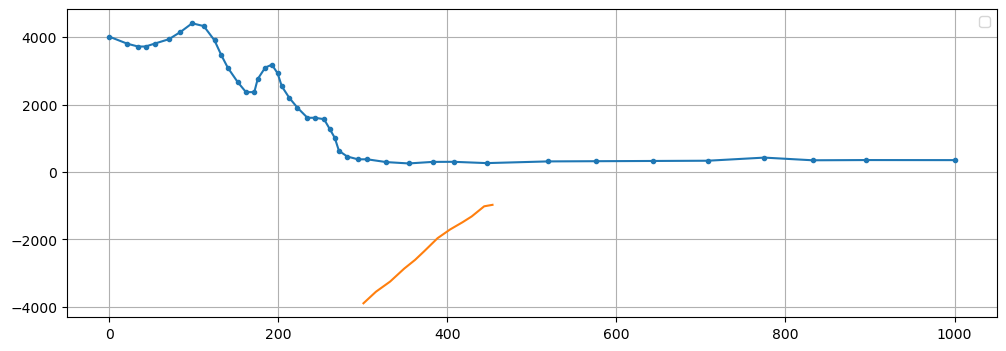

In [19]:
fpath = "/content/drive/MyDrive/bacias/data/"
xo, ho = np.loadtxt("../data/Andes_profile.txt", unpack=True)
xb, hb = np.loadtxt("../data/Beni_profile.txt", unpack=True)

plt.figure(figsize=(12,4))
plt.plot(xo, ho, '.-')
plt.plot(xb, hb)
plt.legend()
plt.grid()

/tmp/ipykernel_430/634237699.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


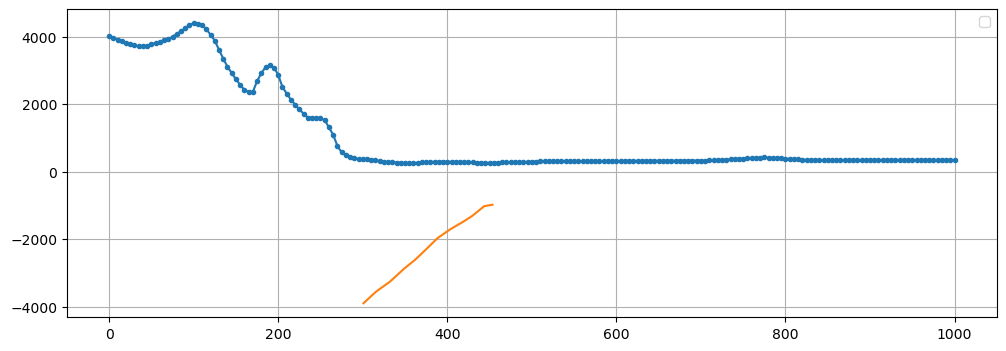

In [20]:
dx = 5.0 # km
L = 1000.0 # km
x = np.arange(0.0, L + dx, dx)
h = np.interp(x, xo, ho)

plt.figure(figsize=(12,4))
plt.plot(x, h, '.-')
plt.plot(xb, hb)
plt.legend()
plt.grid()

/tmp/ipykernel_430/1297102448.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


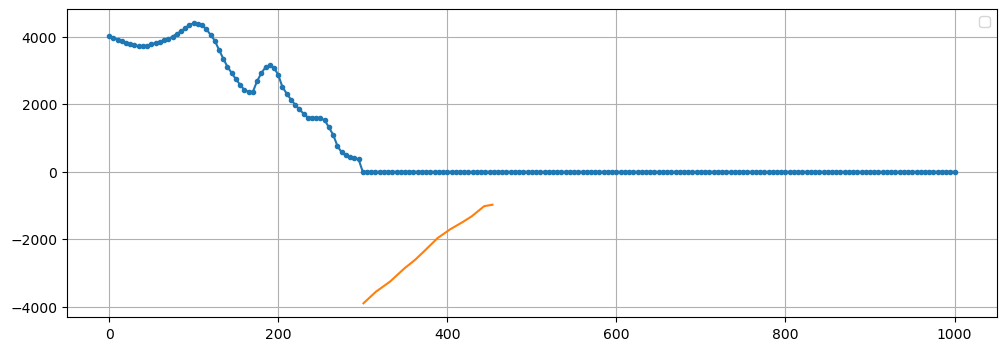

In [21]:
h_load = np.copy(h)
h_load[x>=300] = 0.0

plt.figure(figsize=(12,4))
plt.plot(x, h_load, '.-')
plt.plot(xb, hb)
plt.legend()
plt.grid()

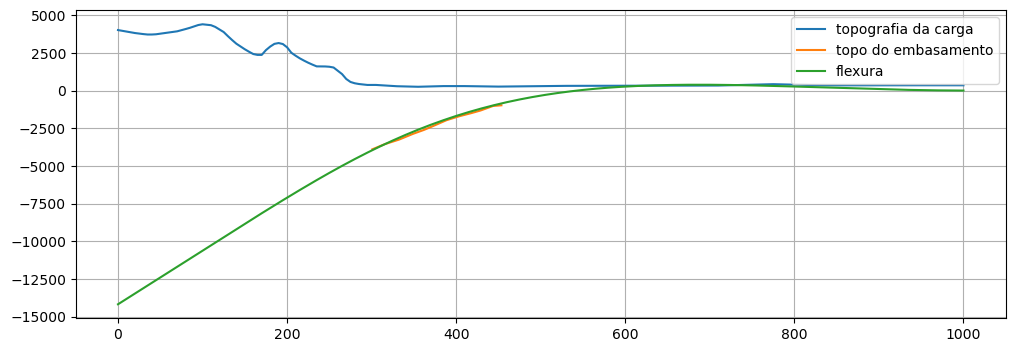

In [22]:
g = 9.8
rhoc = 2_700.0
p = - rhoc * g * h_load
rhos = 2_500.0 # densidade da rocha sedimentar

w = flexura_num(x*1.0e3, Te=80_000, p=p, rhoi=rhos, rompida=True)

plt.figure(figsize=(12,4))
plt.plot(x, h, label="topografia da carga")
plt.plot(xb, hb, label="topo do embasamento")
plt.plot(x, w, label="flexura")
plt.legend()
plt.grid()

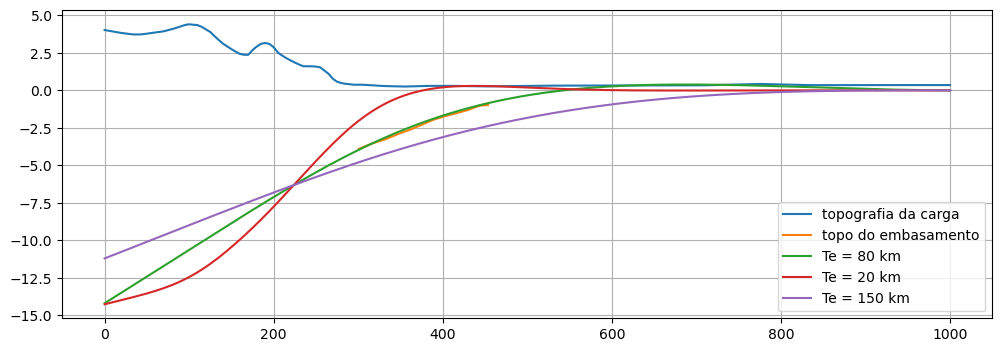

In [23]:
g = 9.8
rhoc = 2_700.0
p = - rhoc * g * h_load
rhos = 2_500.0 # densidade da rocha sedimentar

w20 = flexura_num(x*1.0e3, Te=20_000, p=p, rhoi=rhos, rompida=True)
w80 = flexura_num(x*1.0e3, Te=80_000, p=p, rhoi=rhos, rompida=True)
w150 = flexura_num(x*1.0e3, Te=150_000, p=p, rhoi=rhos, rompida=True)

plt.figure(figsize=(12,4))
plt.plot(x, h/1.0e3, label="topografia da carga")
plt.plot(xb, hb/1.0e3, label="topo do embasamento")
plt.plot(x, w80/1.0e3, label="Te = 80 km")
plt.plot(x, w20/1.0e3, label="Te = 20 km")
plt.plot(x, w150/1.0e3, label="Te = 150 km")
plt.legend()
plt.grid()